___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Smoothing Time Series

It aids in __short term forecasting__.  Here, we want to forecast a value that immediately follows the given data.

However, we can observe that the seasonally adjusted values have too many variations, due to which we may not be able to get a clear trend to forecast accurately. Hence, we need to remove these variations in the data to obtain a clear trend pattern for forecasting.

This process is known as __smoothing__. In the short term forecasting the current smoothed value of the series is used as the forecast for the near future. For example, the smoothed value of December 1960 will be the forecasted value for January 1961.

Commonly used smoothing techniques are:
- Simple moving average
- Exponential smoothing

# MA
## Moving Averages



A moving average (MA) is a widely used indicator in technical analysis that helps smooth out data action by filtering out the “noise” from random short-term data fluctuations. It is a trend-following, or lagging, indicator because it is based on past data.

The two basic and commonly used moving averages are the simple moving average (SMA), which is the simple average of a security over a defined number of time periods, and the exponential moving average (EMA), which gives greater weight to more recent prices.

The most common applications of moving averages are to identify the trend direction and to determine support and resistance levels. While moving averages are useful enough on their own, they also form the basis for other technical indicators such as the moving average convergence divergence (MACD).



In this section we'll compare <em>Simple Moving Averages</em> to <em>Exponentially Weighted Moving Averages</em> in terms of complexity and performance.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a></strong><font color=black>(window)</font>&nbsp;&nbsp;
Provides rolling window calculations<br>
<strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html'>pandas.DataFrame.ewm</a></strong><font color=black>(span)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Provides exponential weighted functions</tt></div></div>

### Perform standard imports and load the dataset
For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [1]:
pwd

'C:\\Users\\Jeswin\\Documents\\Github\\Time series - Python\\05-Time-Series-Analysis-with-Statsmodels'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(11,7)})

In [3]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
airline.dropna(inplace=True)

In [5]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


___
# SMA
## Simple Moving Average

We've already shown how to create a <a href='https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average'>simple moving average</a> by applying a <tt>mean</tt> function to a rolling window.

For a quick review:

In [7]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [8]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


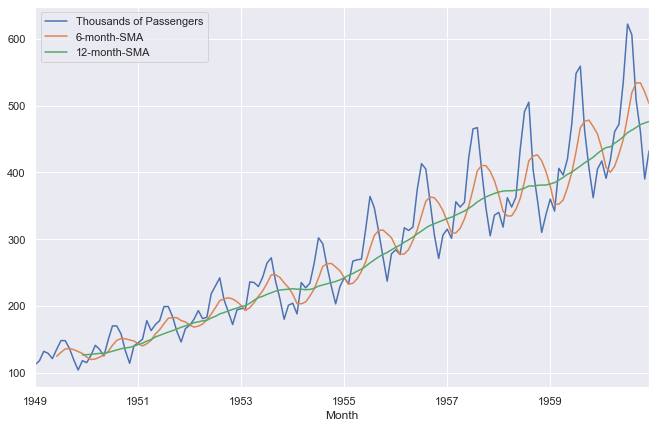

In [9]:
airline.plot();

So calculating simple moving averages can allow us to create a simple model that describes some trend level behaviour of a time series. 

From above graph,  
Using the __12 month window size SMA__ we grab the general trend.  
And from the __6 month windows size SMA__ we can grab the behaviour such as the seasonality.

We could theoritacally use these simple moving averages  to build a generalised model for the real world time series we are analyzing. 


***

### Centered Moving Average

As we have seen earlier the trend line is asymmetric in simple moving average. For n period moving average the first n-1 terms are missing as can be observed in the previous page plots. We can make the trend line symmetric by placing the average in the middle of the time series, this is known as centered moving average. This works well for odd period moving average than even period moving average.

The below figures show the 2, 3, 4 and 5 period centre moving average.

We can observe that 3rd and 5th period centered moving average are symmetric, on the other hand, 2nd and 4th period centered moving average are asymmetric.

In [10]:
airline['CMA Period=2'] =  airline['Thousands of Passengers'].rolling(window=2, center = True).mean()
airline['CMA Period=3'] =  airline['Thousands of Passengers'].rolling(window=3, center = True).mean()
airline['CMA Period=4'] =  airline['Thousands of Passengers'].rolling(window=4, center = True).mean()
airline['CMA Period=5'] =  airline['Thousands of Passengers'].rolling(window=5, center = True).mean()
airline[['Thousands of Passengers','CMA Period=2', 'CMA Period=3', 'CMA Period=4', 'CMA Period=5']].head(10)

,Thousands of Passengers,CMA Period=2,CMA Period=3,CMA Period=4,CMA Period=5
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,115.0,120.666667,NaN,NaN
1949-03-01,132,125.0,126.333333,122.75,122.4
1949-04-01,129,130.5,127.333333,125.00,127.0
1949-05-01,121,125.0,128.333333,129.25,133.0
1949-06-01,135,128.0,134.666667,133.25,136.2
1949-07-01,148,141.5,143.666667,138.00,137.6
1949-08-01,148,148.0,144.000000,141.75,137.2
1949-09-01,136,142.0,134.333333,137.75,131.0


In [11]:
airline[['Thousands of Passengers','CMA Period=2', 'CMA Period=3', 'CMA Period=4', 'CMA Period=5']].tail()

,Thousands of Passengers,CMA Period=2,CMA Period=3,CMA Period=4,CMA Period=5
Month,,,,,
1960-08-01,606,614.0,578.666667,567.75,546.4
1960-09-01,508,557.0,525.000000,549.25,517.4
1960-10-01,461,484.5,453.000000,491.25,479.4
1960-11-01,390,425.5,427.666667,447.75,NaN
1960-12-01,432,411.0,NaN,NaN,NaN


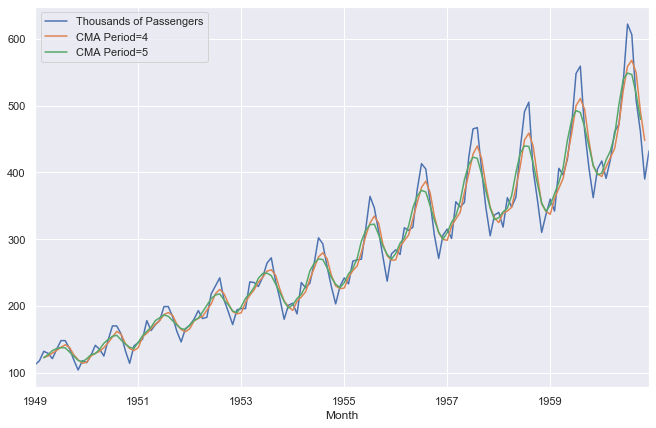

In [12]:
airline[['Thousands of Passengers', 'CMA Period=4', 'CMA Period=5']].plot();

Simple and centered moving average, however, treats the last n observations equally. All observations before that are ignored. In some scenarios all of the past data must be given gradual weightage. Maximum weightage should be given to the most recent data while minimum weightage should be given to the least recent data or vice-versa. In between maximum and minimum there is a gradual change in the weightage which are assigned to the observations. This type of smoothing is called exponential smoothing.

___
# EWMA
## Exponentially Weighted Moving Average 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window (i.e., in the beginning of the simple avgs plot we dont have data).
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

![](02_f1.PNG)


Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

![](02_f2.PNG)



When <tt>adjust=False</tt> is specified, moving averages are calculated as:

![](02_f3.PNG)

which is equivalent to using weights:

![](02_f4.PNG)

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 

![](02_f5.PNG)

therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $$0<\alpha<=1$$ and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment.

For choosing the weight terms, we take alpha from either of the following methods: we either think of it as span or center of mass or half-life. 

$$\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}$$

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [13]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

In [14]:
airline['EWMA6'] = airline['Thousands of Passengers'].ewm(span=6,adjust=False).mean()

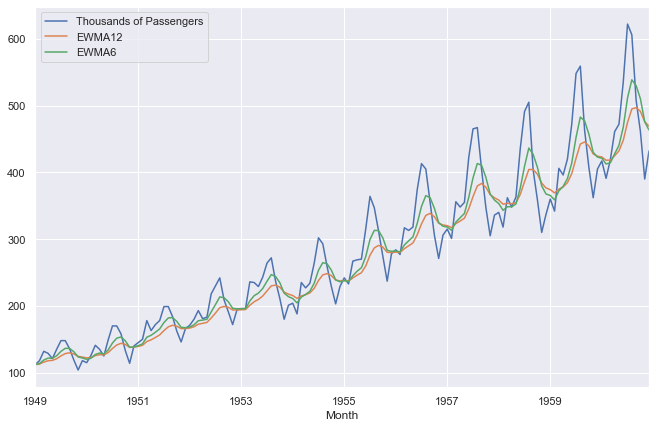

In [15]:
airline[['Thousands of Passengers','EWMA12', 'EWMA6']].plot();

Observe behaviour at the beginning is different than the behaviour at the end. And the sort of seasonality trend is lot more clear towards the end points than the beginning points as we have waited the points closer to the present time heavier than the older time points.   

## Comparing SMA to EWMA

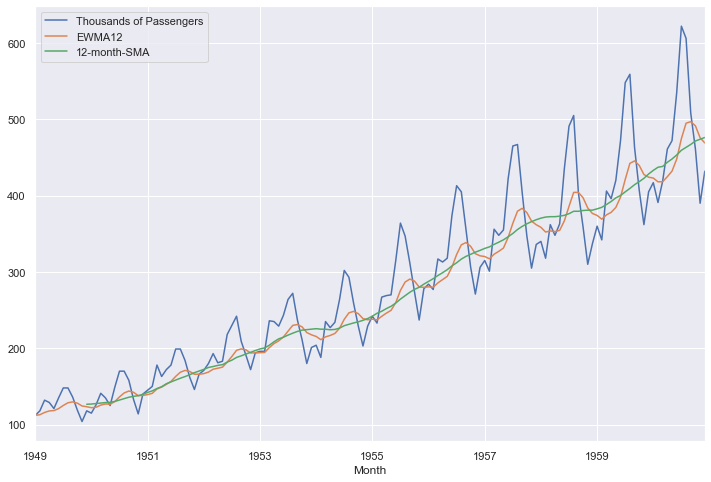

In [16]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

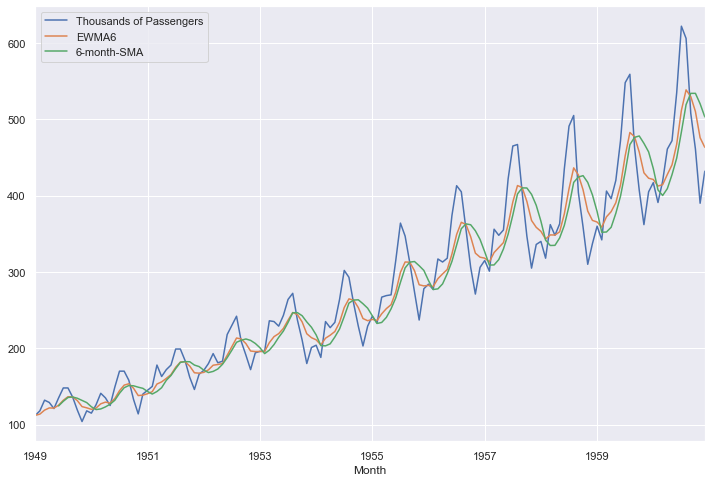

In [17]:
airline[['Thousands of Passengers','EWMA6','6-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Simple Exponential Smoothing
The above example employed <em>Simple Exponential Smoothing</em> with one smoothing factor <strong>α</strong>. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above. In the next section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the Holt-Winters Methods.